In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u 
from astropy import constants as const
from astropy.coordinates import SkyCoord
from analytic_neutrino_flux import *
import math

IceCube recently identified evidence for neutrino emission from NGC 1068. Here our framework is used to estimate the starburst-driven neutrino flux from NGC 1068 and compare it to the reported IceCube flux.

[0] : https://www.science.org/doi/10.1126/science.abg3395

In [3]:
def NGC1068_spectrum(energy,phi0,E0,index):
    return pow(energy,2)*phi0*pow(energy/E0,-index)
#phi0 is the flux normalization at 1 TeV
#gamma = 3.2 +- 0.2 is the best-fit flux

In [4]:
NGC1068_evidence = np.loadtxt("NGC1068_evidence_flux.txt")
NGC1068_evidence_x = [i[0] for i in NGC1068_evidence ]
NGC1068_evidence_y = [NGC1068_spectrum(i*1e-3,5e-11,1,3.2) for i in NGC1068_evidence_x ]
Our_model = [ 1e-3*Flux(i, 250, 500, 1000,150,4, 1e8, 0.52,15.9) for i in NGC1068_evidence_x]
Our_model_2 = [ 1e-3*Flux(i, 250, 500, 1000,150,5.3, 1e8, 0.52,15.9) for i in NGC1068_evidence_x]

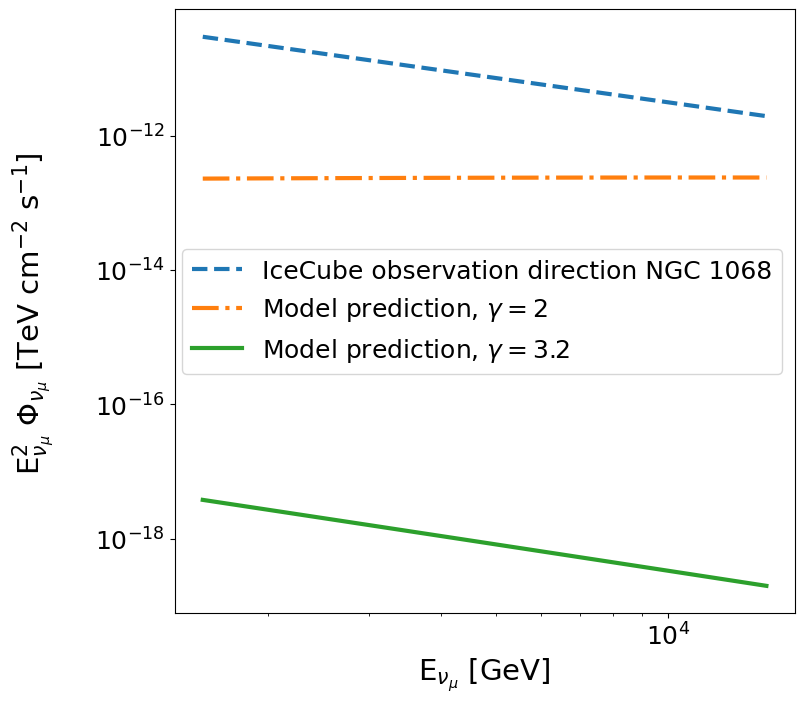

In [5]:
fig=plt.figure(figsize=(8,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(NGC1068_evidence_x,NGC1068_evidence_y,linewidth = 3,linestyle = '--', label = 'IceCube observation direction NGC 1068')

plt.plot(NGC1068_evidence_x,Our_model, linewidth = 3,linestyle = '-.',label = 'Model prediction, $\\gamma = 2$')
plt.plot(NGC1068_evidence_x,Our_model_2,linewidth = 3,label = 'Model prediction, $\\gamma = 3.2$')

plt.xlabel ("E$_{\\nu_\\mu}$ [GeV]", fontsize = 21)
plt.ylabel('E$_{\\nu_{\\mu}}^2$ $\\Phi_{\\nu_\\mu}$ [TeV cm$^{-2}$ s$^{-1}$] \n', fontsize = 21)
plt.legend(fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xscale('log')
plt.yscale('log')
plt.xscale('log')
plt.yscale('log')

As the starburst-driven flux prediction of our model prediction is significantly lower than the flux of IceCube, we predict a dominant contribution of the AGN present in NGC 1068.

In [6]:
NGC1068_100 = Flux(1e3, 250, 500, 100,150,4, 1e8, 0.56,15.9)
NGC1068_1000 = Flux(1e3, 250, 500, 1000,150,4, 1e8, 0.56,15.9)
print("Neutrino flux ratio phi(100 cm-3)/phi(1000 cm-3) = " , NGC1068_100/NGC1068_1000)

Neutrino flux ratio phi(100 cm-3)/phi(1000 cm-3) =  0.4358702303437217


In [7]:
Flux(1e3, 250, 500, 1000,150,4, 1e8, 0.52,15.9)

2.2707846297931542e-10

In [8]:
Flux = np.vectorize(Flux)

In [9]:
elog = np.logspace(2,8,100)

In [10]:
Flux(elog, 220, 600, 175,150,4, 1e8, 0.05,3.9)

array([1.65313938e-10, 1.67015191e-10, 1.68794247e-10, 1.70633059e-10,
       1.72516952e-10, 1.74433927e-10, 1.76374065e-10, 1.78329058e-10,
       1.80291845e-10, 1.82256331e-10, 1.84217174e-10, 1.86169615e-10,
       1.88109347e-10, 1.90032408e-10, 1.91935095e-10, 1.93813894e-10,
       1.95665414e-10, 1.97486339e-10, 1.99273377e-10, 2.01023218e-10,
       2.02732495e-10, 2.04397744e-10, 2.06015369e-10, 2.07581606e-10,
       2.09092493e-10, 2.10543835e-10, 2.11931176e-10, 2.13249775e-10,
       2.14494581e-10, 2.15660217e-10, 2.16740970e-10, 2.17730786e-10,
       2.18623275e-10, 2.19411727e-10, 2.20089123e-10, 2.20648171e-10,
       2.21081325e-10, 2.21380816e-10, 2.21538669e-10, 2.21546714e-10,
       2.21396580e-10, 2.21079680e-10, 2.20587180e-10, 2.19909978e-10,
       2.19038688e-10, 2.17963652e-10, 2.16674985e-10, 2.15162654e-10,
       2.13416595e-10, 2.11426849e-10, 2.09183716e-10, 2.06677926e-10,
       2.03900809e-10, 2.00844484e-10, 1.97502060e-10, 1.93867850e-10,
      

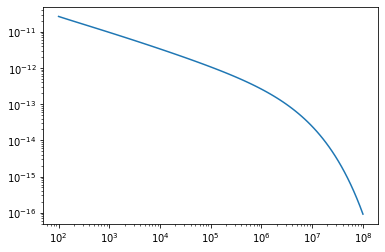

In [11]:
plt.plot(elog,(Flux(elog, 220, 600, 175,150,4.5, 1e8, 0.05,3.9)))
plt.xscale('log')
plt.yscale('log')

In [12]:
(Flux(1e3, 220, 600, 175,150,4, 1e8, 0.05,3.9)/pow(1e3,2))*1e3+1e-14

2.0657990678748298e-13